# 911 Calls Data Cleaning and Visualization Project

The goal of this project is to clean the data, modify it, and visualize various aspects of the data using Seaborn and Matplotlib plotting Capabilities. 
Specifically, the goal is to analyze calls by their reason and time, to hypothetically determine what departments would need more staff and what time of day, day of the week and month of the year that more 911 staff would need to be appointed. 
This project was part of a Udemy Course

## Data and Setup

-Import Numpy and Pandas Libraries.  
-Import matplotlib, seaborn. Set style as whitegrid for preference, and Matplotlib inline to see graphs in Jupyter.

In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Read the file and check info and first few lines of dataset. 

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


-Using pandas to see the top 5 zip codes with the most phone calls, top 5 townships, and how many unique title calls there are. 

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

110

Let's delete useless columns now. Since the goal of this project is to analyze calls by their reason and time, let's delete all other columns (location specifically)

In [9]:
df = df.drop(['lat','lng','desc','zip','twp','addr','e'], axis = 1)
df

,title,timeStamp
0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00
1,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00
2,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00
3,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01
4,EMS: DIZZINESS,2015-12-10 17:40:01
...,...,...
99487,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00
99488,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02
99489,EMS: FALL VICTIM,2016-08-24 11:12:00
99490,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01


Now that the Data is cleaned into our 2 desired columns, we need to do a few things.  
  
Firstly, Let's split the title column into Reason, and title. There are only 3 differenttypes of reason: EMS, Traffic and Fire, so it's a lot easier to analyse just reasons. 

In [10]:
#This code changes the title column, and creates a new Reason column
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['title'] = df['title'].apply(lambda x: x.split(':')[1])
df.columns = ['Injury', 'timeStamp', 'Reason']
df.head()

,Injury,timeStamp,Reason
0,BACK PAINS/INJURY,2015-12-10 17:40:00,EMS
1,DIABETIC EMERGENCY,2015-12-10 17:40:00,EMS
2,GAS-ODOR/LEAK,2015-12-10 17:40:00,Fire
3,CARDIAC EMERGENCY,2015-12-10 17:40:01,EMS
4,DIZZINESS,2015-12-10 17:40:01,EMS


Let's find out the most common reason (EMS), and use Seaborn to create a plot of bar plot of reasons, and create a bar plot of reason.

In [11]:
df['Reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

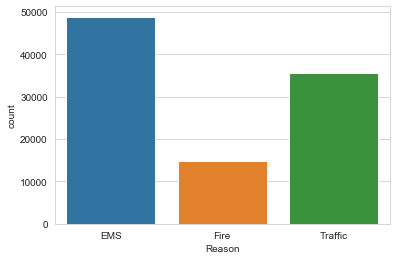

In [12]:
sns.countplot(x = 'Reason', data=df)

Let's find the 5 most common injuries/problems and plot them all. 

In [59]:
df['Injury'].value_counts().head()

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
Name: Injury, dtype: int64

In [63]:
injury_data = [['VEHICLE ACCIDENT', 23066], ['DISABLED VEHICLE', 7702], ['VEHICLE ACCIDENT', 5573], ['FIRE ALARM', 5510], ['RESPIRATORY EMERGENCY', 5512]]
df2 = pd.DataFrame(injury_data, columns = ['injury', 'count'])
df2

,injury,count
0,VEHICLE ACCIDENT,23066
1,DISABLED VEHICLE,7702
2,VEHICLE ACCIDENT,5573
3,FIRE ALARM,5510
4,RESPIRATORY EMERGENCY,5512


Text(0.5, 1.0, 'Number of the top 5 Injuries')

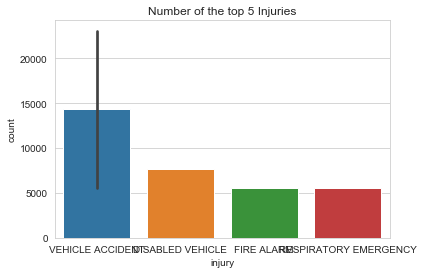

In [68]:
sns.barplot(x = 'injury', y = 'count', data = df2)
plt.title('Number of the top 5 Injuries')

Let's change the timeStamp column so it is more useful. We can see below that the time columns is a string object. 

In [15]:
type(df['timeStamp'].iloc[0])

str

Let's use pd.to_datetime to change this to a time object which can be called with time.hour,time.minute etc..  
Then let's use lambda functions to make an Hour, Month and Day of the Week column

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
print(df['timeStamp'][1])

2015-12-10 17:40:00


In [22]:
time = df['timeStamp']
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of the Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,Injury,timeStamp,Reason,Hour,Month,Day of the Week
0,BACK PAINS/INJURY,2015-12-10 17:40:00,EMS,17,12,3
1,DIABETIC EMERGENCY,2015-12-10 17:40:00,EMS,17,12,3
2,GAS-ODOR/LEAK,2015-12-10 17:40:00,Fire,17,12,3
3,CARDIAC EMERGENCY,2015-12-10 17:40:01,EMS,17,12,3
4,DIZZINESS,2015-12-10 17:40:01,EMS,17,12,3


Then I created a dictionary which can change Day of the week from numbers to string objects. For readability. 

In [23]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
df['Day of the Week'] = df['Day of the Week'].map(days)

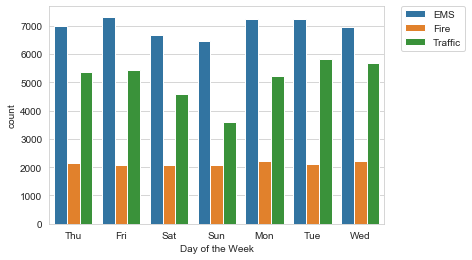

In [25]:
sns.countplot(x = 'Day of the Week', data = df, hue = 'Reason')
#Relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can see that every type of call is fairly constant. There are less traffic calls on Sat and Sun (most likely due to people not driving to work), and Fire calls are constant throughout the week. 

Now let's do the same for month.

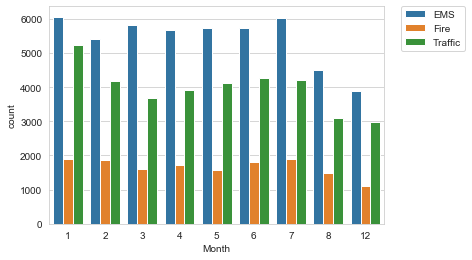

In [26]:
sns.countplot(x = 'Month', data = df, hue = 'Reason')
#Relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Some months are missing, so we need to modify the Dataset to include all the months. Let's create a groupby object where we group all of the data by month

In [28]:
byMonth = df.groupby('Month').count()
byMonth.head(12)

,Injury,timeStamp,Reason,Hour,Day of the Week
Month,,,,,
1,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423
6,11786,11786,11786,11786,11786
7,12137,12137,12137,12137,12137
8,9078,9078,9078,9078,9078
12,7969,7969,7969,7969,7969


Then we created a bar plot of the number of calls per month. From this, we can see that the # of calls goes down dramatically from August - December

Text(0.5, 1.0, 'Number of calls per Month')

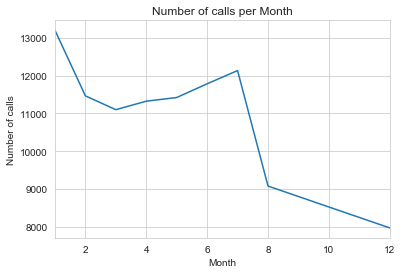

In [33]:
byMonth['Injury'].plot()
plt.ylabel('Number of calls')
plt.title('Number of calls per Month')

Let's create a linear regression plot

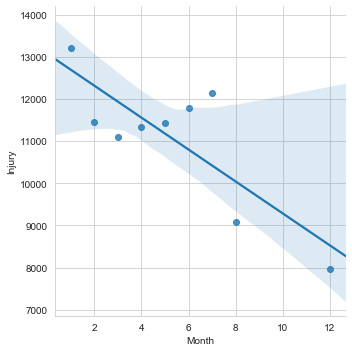

In [35]:
sns.lmplot(x = 'Month', y = 'Injury', data = byMonth.reset_index())

Let's now create a new date column, and ude groupby to plot 911 calls by day

In [36]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

Text(0.5, 1.0, 'Total Number of Calls per Month, varying by day')

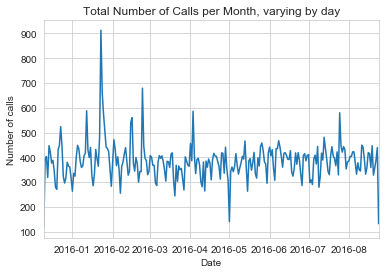

In [39]:
Date_groups = df.groupby('Date').count()['Injury']
Date_groups.plot()
plt.ylabel('Number of calls')
plt.title('Total Number of Calls per Month, varying by day')

Then I did it for all 3 Reasons (EMF, Traffic, Fire)

Text(0.5, 1.0, 'Traffic Calls per Month')

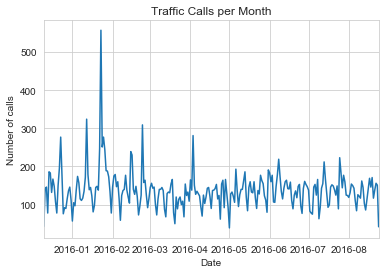

In [42]:
df[df['Reason']== 'Traffic'].groupby('Date').count()['Injury'].plot()
plt.ylabel('Number of calls')
plt.title('Traffic Calls per Month')

Text(0.5, 1.0, 'Fire Calls per Month')

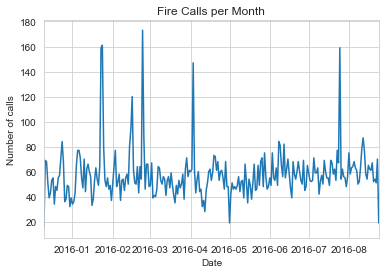

In [43]:
df[df['Reason']== 'Fire'].groupby('Date').count()['Injury'].plot()
plt.ylabel('Number of calls')
plt.title('Fire Calls per Month')


Text(0.5, 1.0, 'EMS Calls per Month')

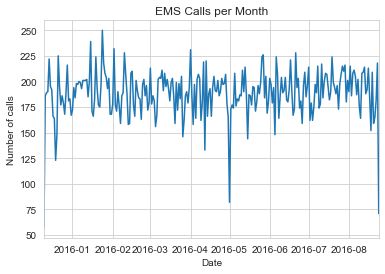

In [44]:
df[df['Reason']== 'EMS'].groupby('Date').count()['Injury'].plot()
plt.ylabel('Number of calls')
plt.title('EMS Calls per Month')

Then I made Heat maps.  
Firstly, I grouped the data into day of the week, hour and reasons. It is a 7 x 24 table, which makes sense (7 days in a week, 24 hours in a day)

In [45]:
dayHour = df.groupby(by = ['Day of the Week','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Text(0.5, 1, 'Heat Map of Day of the week vs Hour')

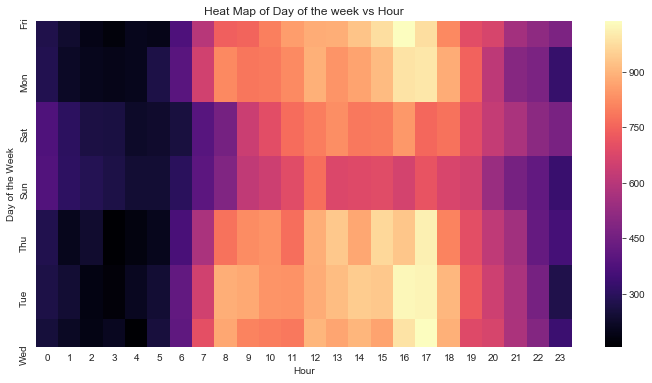

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap = 'magma' )
plt.title('Heat Map of Day of the week vs Hour')

We can see from this data that the number of calls is much higher during the midday hours, and peaks 4 and 5 pm. Additionally, calls are fairly constant throughout the week but decrease during the weekend during the day, but increase slightly during wekeend nights. A cluster map can confirm this.

Text(0.5, 1, 'Number of calls ')

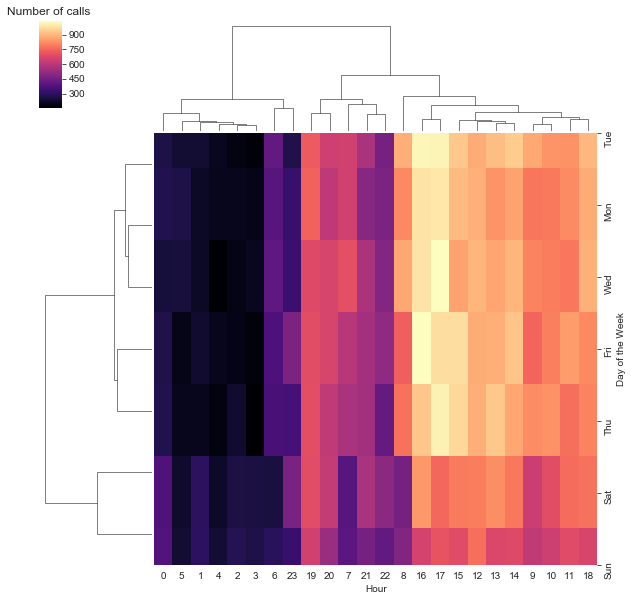

In [51]:
sns.clustermap(dayHour, cmap = 'magma')
plt.title('Number of calls ')

The dark cluster confirms that calls are lower at nighttime (during midnight and 8 am), and the light cluster shows that the calls are highest in the afternoon and late morning. Additionally, the bottom lines of data show that Saturday and Sunday have lower call rates that the weekdays. 

Let's do the same With day vs Month

In [52]:
dayMonth = df.groupby(by = ['Day of the Week','Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of the Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


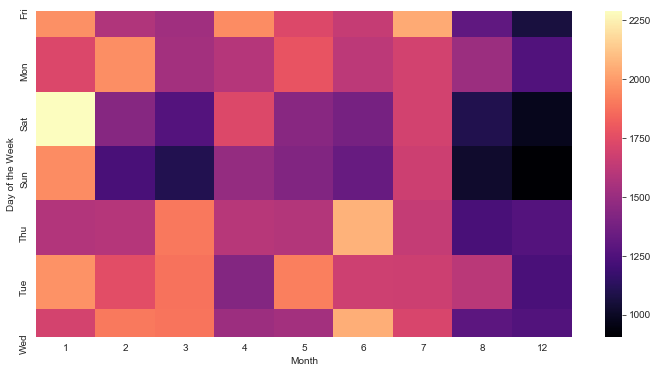

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap = 'magma' )

This figure doesn't show much correlation, so let's analyze a clustermap. 

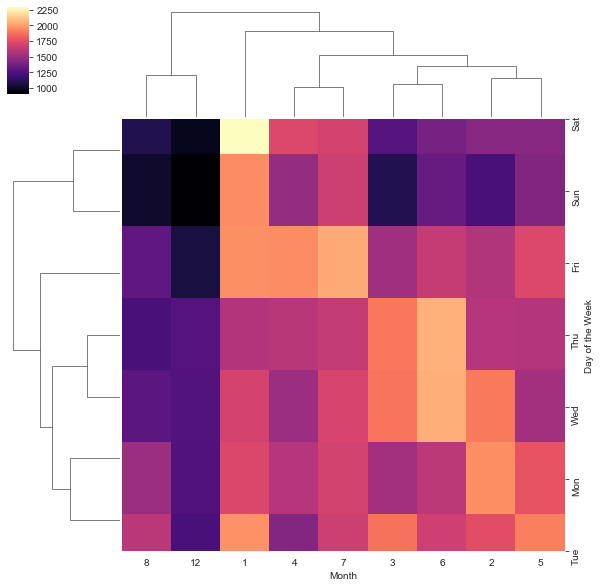

In [56]:
sns.clustermap(dayMonth, cmap = 'magma')

This clustermap shows that Saturday and Sundays generally have lower numbers of calls, with outliers in January. Everything else is fairly randomly spread out